In [6]:
%matplotlib inline
import os
from keras.preprocessing.image import load_img, img_to_array
import random
import matplotlib.pyplot as plt
import numpy as np
from keras import backend as K
from keras import applications
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3, decode_predictions, preprocess_input
from keras.layers import Dense, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping, TensorBoard
from sklearn.model_selection import train_test_split 

# Configuration

In [7]:
data_path = '/home/ml_member/syntetiq/machine_learning/Challenge_1'
tensorboard_logs = './graph'

# Loading images

In [8]:
data_x = []
data_y = []

files = os.listdir(data_path, )
for img_file in files:
    if img_file.endswith('jpg'):
        print('img file: '+img_file)
        img = load_img(os.path.join(data_path, img_file), target_size=(299, 299))
        data_x.append(img_to_array(img))
        data_y.append([1,0] if img_file.startswith('cat') else [0,1])
            

img file: cat_239.jpg
img file: cat_657.jpg
img file: dog_918.jpg
img file: cat_439.jpg
img file: cat_53.jpg
img file: cat_264.jpg
img file: cat_625.jpg
img file: dog_344.jpg
img file: dog_807.jpg
img file: dog_20.jpg
img file: cat_314.jpg
img file: cat_386.jpg
img file: dog_727.jpg
img file: cat_761.jpg
img file: cat_529.jpg
img file: cat_506.jpg
img file: cat_770.jpg
img file: dog_35.jpg
img file: dog_844.jpg
img file: cat_473.jpg
img file: dog_41.jpg
img file: cat_596.jpg
img file: dog_664.jpg
img file: dog_307.jpg
img file: dog_888.jpg
img file: cat_281.jpg
img file: dog_127.jpg
img file: dog_383.jpg
img file: cat_789.jpg
img file: cat_442.jpg
img file: cat_813.jpg
img file: dog_430.jpg
img file: dog_294.jpg
img file: dog_833.jpg
img file: cat_708.jpg
img file: cat_122.jpg
img file: cat_271.jpg
img file: cat_650.jpg
img file: dog_277.jpg
img file: dog_964.jpg
img file: dog_95.jpg
img file: dog_198.jpg
img file: cat_248.jpg
img file: dog_854.jpg
img file: dog_784.jpg
img file: dog_5

img file: cat_576.jpg
img file: cat_332.jpg
img file: dog_618.jpg
img file: cat_33.jpg
img file: dog_875.jpg
img file: cat_267.jpg
img file: cat_685.jpg
img file: cat_917.jpg
img file: cat_60.jpg
img file: dog_936.jpg
img file: cat_396.jpg
img file: dog_538.jpg
img file: cat_588.jpg
img file: dog_167.jpg
img file: dog_532.jpg
img file: dog_494.jpg
img file: cat_225.jpg
img file: cat_62.jpg
img file: cat_403.jpg
img file: dog_97.jpg
img file: dog_140.jpg
img file: dog_734.jpg
img file: cat_385.jpg
img file: dog_578.jpg
img file: dog_763.jpg
img file: cat_851.jpg
img file: dog_686.jpg
img file: cat_453.jpg
img file: dog_255.jpg
img file: dog_498.jpg
img file: cat_293.jpg
img file: dog_627.jpg
img file: cat_765.jpg
img file: cat_93.jpg
img file: dog_824.jpg
img file: cat_703.jpg
img file: dog_8.jpg
img file: cat_175.jpg
img file: cat_36.jpg
img file: cat_699.jpg
img file: dog_564.jpg
img file: dog_715.jpg
img file: cat_501.jpg
img file: dog_942.jpg
img file: cat_466.jpg
img file: dog_836.

img file: cat_681.jpg
img file: dog_649.jpg
img file: cat_57.jpg
img file: dog_356.jpg
img file: cat_516.jpg
img file: dog_258.jpg
img file: cat_909.jpg
img file: dog_729.jpg
img file: cat_956.jpg
img file: dog_76.jpg
img file: cat_890.jpg
img file: dog_240.jpg
img file: dog_861.jpg
img file: dog_381.jpg
img file: cat_470.jpg
img file: cat_926.jpg
img file: cat_507.jpg
img file: cat_758.jpg
img file: dog_317.jpg
img file: dog_433.jpg
img file: cat_197.jpg
img file: dog_692.jpg
img file: dog_367.jpg
img file: cat_416.jpg
img file: cat_683.jpg
img file: cat_661.jpg
img file: cat_905.jpg
img file: dog_522.jpg
img file: dog_499.jpg
img file: cat_373.jpg
img file: cat_913.jpg
img file: cat_497.jpg
img file: dog_72.jpg
img file: cat_723.jpg
img file: cat_137.jpg
img file: dog_747.jpg
img file: cat_656.jpg
img file: cat_218.jpg
img file: cat_820.jpg
img file: dog_860.jpg
img file: dog_652.jpg
img file: cat_64.jpg
img file: cat_611.jpg
img file: cat_431.jpg
img file: dog_147.jpg
img file: cat_

img file: dog_183.jpg
img file: cat_255.jpg
img file: cat_52.jpg
img file: cat_601.jpg
img file: dog_229.jpg
img file: dog_864.jpg
img file: cat_27.jpg
img file: cat_42.jpg
img file: dog_514.jpg
img file: dog_531.jpg
img file: dog_553.jpg
img file: dog_416.jpg
img file: cat_616.jpg
img file: dog_965.jpg
img file: cat_169.jpg
img file: dog_798.jpg
img file: cat_922.jpg
img file: dog_324.jpg
img file: cat_530.jpg
img file: cat_843.jpg
img file: dog_161.jpg
img file: dog_742.jpg
img file: cat_799.jpg
img file: cat_798.jpg
img file: cat_250.jpg
img file: dog_137.jpg
img file: dog_314.jpg
img file: dog_339.jpg
img file: cat_794.jpg
img file: cat_932.jpg
img file: cat_402.jpg
img file: cat_551.jpg
img file: cat_676.jpg
img file: dog_694.jpg
img file: dog_465.jpg
img file: cat_74.jpg
img file: dog_733.jpg
img file: dog_58.jpg
img file: dog_951.jpg
img file: cat_564.jpg
img file: dog_278.jpg
img file: cat_868.jpg
img file: dog_114.jpg
img file: dog_411.jpg
img file: cat_114.jpg
img file: cat_5

img file: dog_187.jpg
img file: dog_252.jpg
img file: dog_914.jpg
img file: cat_305.jpg
img file: cat_107.jpg
img file: cat_231.jpg
img file: cat_561.jpg
img file: cat_12.jpg
img file: dog_708.jpg
img file: cat_205.jpg
img file: cat_518.jpg
img file: dog_44.jpg
img file: dog_719.jpg
img file: cat_559.jpg
img file: dog_957.jpg
img file: cat_189.jpg
img file: dog_728.jpg
img file: dog_26.jpg
img file: dog_331.jpg
img file: dog_988.jpg
img file: cat_116.jpg
img file: dog_604.jpg
img file: cat_874.jpg
img file: cat_816.jpg
img file: dog_585.jpg
img file: cat_704.jpg
img file: dog_176.jpg
img file: dog_60.jpg
img file: dog_723.jpg
img file: dog_337.jpg
img file: dog_783.jpg
img file: dog_484.jpg
img file: dog_146.jpg
img file: dog_435.jpg
img file: cat_108.jpg
img file: dog_889.jpg
img file: dog_956.jpg
img file: dog_94.jpg
img file: cat_995.jpg
img file: dog_919.jpg
img file: dog_160.jpg
img file: cat_252.jpg
img file: dog_206.jpg
img file: cat_795.jpg
img file: cat_783.jpg
img file: cat_6

img file: cat_364.jpg
img file: dog_655.jpg
img file: dog_451.jpg
img file: dog_523.jpg
img file: cat_622.jpg
img file: dog_672.jpg
img file: cat_263.jpg
img file: cat_607.jpg
img file: dog_880.jpg
img file: dog_326.jpg
img file: dog_186.jpg
img file: dog_535.jpg
img file: cat_963.jpg
img file: dog_937.jpg
img file: cat_515.jpg
img file: cat_548.jpg
img file: cat_308.jpg
img file: dog_292.jpg
img file: cat_942.jpg
img file: dog_841.jpg
img file: dog_718.jpg
img file: cat_7.jpg
img file: cat_599.jpg
img file: dog_805.jpg
img file: dog_725.jpg
img file: dog_524.jpg
img file: dog_697.jpg
img file: dog_570.jpg
img file: cat_447.jpg
img file: dog_651.jpg
img file: dog_149.jpg
img file: dog_205.jpg
img file: dog_586.jpg
img file: cat_381.jpg
img file: dog_597.jpg
img file: dog_75.jpg
img file: cat_649.jpg
img file: dog_958.jpg
img file: dog_845.jpg
img file: cat_632.jpg
img file: cat_347.jpg
img file: dog_279.jpg
img file: dog_126.jpg
img file: dog_594.jpg
img file: cat_941.jpg
img file: cat

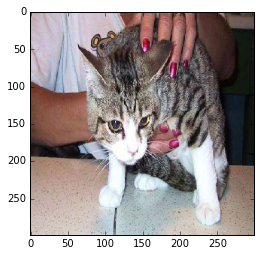

In [9]:
plt.imshow(data_x[0]/255.0)
plt.figure()

# Creating train, validation, test set

In [10]:
# No validation set, it's automatic by Keras controlled by validation_split at fit
train_x, test_x, train_y, test_y  = train_test_split(preprocess_input(np.array(data_x)), data_y, test_size=0.1, random_state=42)

data_x = None

In [11]:
len(train_x),  len(test_x)

(1800, 200)

In [12]:
len(train_y), len(test_y)

(1800, 200)

# Inception V3 model directly

Obvious solution is to check the imagenet winners like pretrained VGG or inception what they predict.

In [13]:
model_with_top = InceptionV3(include_top=True, weights='imagenet')
K.image_data_format() == 'channels_last'

True

In [14]:
preds = model_with_top.predict(test_x[0:5])
print('Predicted:', decode_predictions(np.asarray(preds), top=1))

('Predicted:', [[(u'n02105412', u'kelpie', 0.66211128)], [(u'n02123394', u'Persian_cat', 0.34563172)], [(u'n02099429', u'curly-coated_retriever', 0.35157925)], [(u'n02099601', u'golden_retriever', 0.85134935)], [(u'n02111277', u'Newfoundland', 0.54743701)]])


As it can be seen there is not clear cat or dog category among the 1000 classes, but there are multiple dog and cat subspecies. Now I don't create a test accuracy of direct InceptionV3 on our testset, however it would be intresting to see if the prediction here will be better compared to transfer learning

# Inception V3 - Transfer learning

Transfer learning is the most frequently applied solution in computer vision. In this method you apply a pretrainded model (domain A, typically trained on lots of data) and transfer the knowledge of it to your domain (Domain B, with less data). If the domain A is similar to domain B then you don't have to re-train too much layers. In our case domain B is quite similar to domain A, since ImageNet contains also cats and dogs among other object, but now we're only focusing only these 2.


In [15]:
model_no_top = InceptionV3(input_shape=(299, 299, 3), weights='imagenet', include_top=False)

Checkins which layers the original inception model with the top has as extra

In [16]:
model_with_top.layers[len(model_no_top.layers): ]

So we will rebuild these layers, but since we have only 2 classes the last dense layer will have softmax only with 2 neurons.

In [17]:
x = model_no_top.output
x = GlobalAveragePooling2D()(x)
outputs = Dense(2, activation='softmax')(x)

model = Model(inputs=model_no_top.input, outputs = outputs)
# Freeze the inception layers
for layer in model_no_top.layers:
    layer.trainable = False

    
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
early_stop = EarlyStopping(monitor='val_acc', patience=2, verbose=1, mode='max')
tbCallBack = TensorBoard(log_dir=tensorboard_logs, histogram_freq=0, write_graph=True, write_images=True)

model.fit(train_x, np.array(train_y),
          batch_size = 64,
          epochs = 5,
          validation_split=0.11,
          callbacks=[early_stop, tbCallBack],
          verbose = 1)


Train on 1602 samples, validate on 198 samples
Epoch 1/5
1602/1602 [==============================] - 1995s 1s/step - loss: 0.4563 - acc: 0.8102 - val_loss: 0.1776 - val_acc: 0.9697
Epoch 2/5
1602/1602 [==============================] - 1889s 1s/step - loss: 0.2099 - acc: 0.9494 - val_loss: 0.1515 - val_acc: 0.9596
Epoch 3/5
1602/1602 [==============================] - 1913s 1s/step - loss: 0.1529 - acc: 0.9576 - val_loss: 0.1048 - val_acc: 0.9798
Epoch 4/5
1602/1602 [==============================] - 1908s 1s/step - loss: 0.1419 - acc: 0.9588 - val_loss: 0.1097 - val_acc: 0.9798
Epoch 5/5
1602/1602 [==============================] - 1889s 1s/step - loss: 0.1223 - acc: 0.9657 - val_loss: 0.0767 - val_acc: 0.9848


# Evaluate model

In [19]:
scores = model.evaluate(test_x, np.array(test_y), batch_size=64, verbose=1)


200/200 [==============================] - 247s 1s/step


In [20]:
print("\n%s: %.2f" % (model.metrics_names[0], scores[0]))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


loss: 0.10

acc: 96.00%


# Pure Convolutional neural network

It's not even worth trying it, it would need millions of data for this use case. However, it's quite easy to make up a CNN the params should be explored through search like gridsearch. And it should be trained in a distributed way.


# Future work
- one more dense layer before output layer
- grid search on hyperparams, now they are fixed.
- data augmentation
